<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Projects/blob/main/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import tree
from sklearn import metrics
from sklearn import nsemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import feature_selection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#n
# os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/'
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/'
!kaggle competitions download -c digit-recognizer
!unzip \*.zip && rm *.zip
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")
X = train.drop(["label"], axis=1).values / 255
Y = train["label"].values
test /= 255
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, random_state=77, test_size=0.2)

  0% 0.00/9.16M [00:00<?, ?B/s]
100% 9.16M/9.16M [00:00<00:00, 84.5MB/s]
 82% 5.00M/6.09M [00:00<00:00, 50.4MB/s]
100% 6.09M/6.09M [00:00<00:00, 56.2MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 72.5MB/s]
Archive:  train.csv.zip
  inflating: train.csv               

Archive:  test.csv.zip
  inflating: test.csv                

2 archives were successfully processed.


In [ ]:
path = "/content/drive/MyDrive/NewFolder/"

models_preds = []
for p in range(1, 24):
  model_path = path + f"m{p}.h5"
  model = tf.keras.models.load_model(model_path)
  sub = model.predict(test.values.reshape((-1, 28, 28)))
  sub = np.argmax(sub, axis=1)
  models_preds.append(sub)
diff = pd.DataFrame(models_preds)

In [ ]:
arr=[]
transpose_diff=diff.T
for i in range(len(transpose_diff)):
  item = transpose_diff.iloc[i]
  temp=item.unique()
  arr.append(temp[0])
save_file = pd.DataFrame(arr, columns=["Label"])
save_file.to_csv("/content/sample_submission.csv")

In [ ]:
path = "/content/drive/MyDrive/NewFolder/"
path = "/content/drive/MyDrive/"
path=""
m_d = {}
sub = pd.read_csv("/content/sample_submission.csv")
for p in [18]:
  model_path = path + f"m{p}.h5"
  model = tf.keras.models.load_model(model_path)
  model.fit(X.reshape((-1, 28, 28)), Y, epochs =30, validation_data=(test.values.reshape((-1, 28, 28)), sub.Label.values))
  train_evaluate = model.evaluate(X.reshape((-1, 28, 28)), Y)
  test_evaluate = model.evaluate(test.values.reshape((-1, 28, 28)), sub.Label.values) 
  model.save(path+f"Final_Model_2.h5")
  m_d[p] = { "train_accuracy":train_evaluate[1], "train_loss": train_evaluate[0], "test_accuracy":test_evaluate[1], "test_loss": test_evaluate[0]}
  models_d = pd.DataFrame(m_d).T

In [ ]:
save_file.to_csv(path+"sample_submission.csv")
sub = pd.read_csv(path+"sample_submission.csv")

In [ ]:
def plot_loss_curves(history):
  hist = history.history
  loss, val_loss = hist["loss"], hist["val_loss"]
  accuracy, val_accuracy = hist["accuracy"], hist["val_accuracy"]
  epochs = range(1, len(hist["loss"])+1)
  plt.title("Accuracy")
  plt.plot(epochs, accuracy, label="Training")
  plt.plot(epochs, val_accuracy, label="Testing")
  plt.legend()
  plt.figure()
  plt.title("Loss")
  plt.plot(epochs, loss, label="Training")
  plt.plot(epochs, val_loss, label="Testing")
  plt.legend()
  plt.show()  

In [ ]:
# path = "/content/drive/MyDrive/Colab Notebooks/New folder/"
# path = "/content/drive/MyDrive/New folder/"
path = "/content/drive/MyDrive/NewFolder/"
m_d = {}
history_list=[]
for p in range(1, 24):
  model_path = path + f"m{p}.h5"
  model = tf.keras.models.load_model(model_path)
  history=model.fit(X.reshape((-1, 28, 28)), Y, epochs = 10, validation_data=(test.values.reshape((-1, 28, 28))//5, sub.Label.values//5))
  train_evaluate = model.evaluate(X.reshape((-1, 28, 28)), Y)
  test_evaluate = model.evaluate(test.values.reshape((-1, 28, 28)), sub.Label.values) 
  model.save(f"full_dataset_m{p}.h5")
  history_list.append(history)
  # m_d[p] = { "train_accuracy":train_evaluate[1], "train_loss": train_evaluate[0], "test_accuracy":test_evaluate[1], "test_loss": test_evaluate[0]}
  m_d[p] = { "train_accuracy":train_evaluate[1], "train_loss": train_evaluate[0], "test_accuracy":test_evaluate[1], "test_loss": test_evaluate[0], "history":history}
  models_d = pd.DataFrame(m_d).T

Epoch 1/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0208 - accuracy: 0.9942 - val_loss: 2.1261 - val_accuracy: 0.4866
Epoch 2/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0173 - accuracy: 0.9948 - val_loss: 2.1193 - val_accuracy: 0.4866
Epoch 3/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0148 - accuracy: 0.9957 - val_loss: 2.1372 - val_accuracy: 0.4866
Epoch 4/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0137 - accuracy: 0.9963 - val_loss: 2.1175 - val_accuracy: 0.4866
Epoch 5/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0124 - accuracy: 0.9965 - val_loss: 2.1053 - val_accuracy: 0.4866
Epoch 6/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0117 - accuracy: 0.9968 - val_loss: 2.1142 - val_accuracy: 0.4866
Epoch 7/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0103 - accuracy: 0.9972 - val_loss: 2.0878 - val_accur

In [ ]:
models_d.to_csv(path+"modelsion.csv")


In [ ]:
models_d.to_csv(path+"modelsion.csv")

models_d.sort_values( by="test_accuracy")

,train_accuracy,train_loss,test_accuracy,test_loss,history
7,0.949071,0.179578,0.941679,0.200327,<keras.callbacks.History object at 0x7fbde3006...
17,0.99919,0.00273712,0.983786,0.237849,<keras.callbacks.History object at 0x7fbe3e088...
10,0.999405,0.00178584,0.985107,0.136559,<keras.callbacks.History object at 0x7fbe8059b...
6,0.98931,0.0361637,0.9855,0.0426943,<keras.callbacks.History object at 0x7fbde31c5...
23,0.997952,0.00582041,0.985893,0.0783954,<keras.callbacks.History object at 0x7fbde1eb6...
22,0.999929,0.000242716,0.986143,0.091836,<keras.callbacks.History object at 0x7fbde2056...
15,0.99919,0.00289411,0.986286,0.0706088,<keras.callbacks.History object at 0x7fbe3dd76...
19,0.999619,0.0011712,0.986357,0.0897192,<keras.callbacks.History object at 0x7fbde229e...
18,0.999786,0.00070022,0.986464,0.0941299,<keras.callbacks.History object at 0x7fbde2500...
5,0.99931,0.00208294,0.9865,0.115861,<keras.callbacks.History object at 0x7fbde3c31...


In [ ]:
b=0

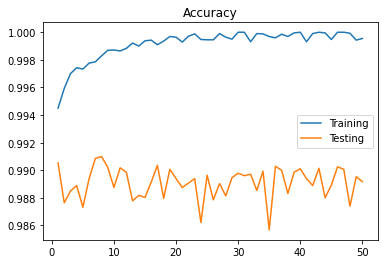

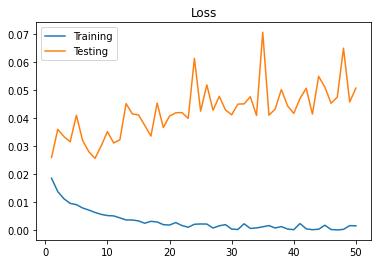

In [ ]:
hist=models_d_2222.history.values[b]
plot_loss_curves(hist)
b+=1


In [ ]:
# path = "/content/drive/MyDrive/Colab Notebooks/New folder/"
# path = "/content/drive/MyDrive/New folder/"
path = "/content/drive/MyDrive/NewFolder/"
m_d = {}
history_list=[]
for p in [1, 12]:
  model_path = path + f"m{p}.h5"
  model = tf.keras.models.load_model(model_path)
  history=model.fit(X.reshape((-1, 28, 28)), Y, epochs = 50, validation_data=(test.values.reshape((-1, 28, 28)), sub.Label.values))
  train_evaluate = model.evaluate(X.reshape((-1, 28, 28)), Y)
  test_evaluate = model.evaluate(test.values.reshape((-1, 28, 28)), sub.Label.values) 
  model.save(f"full_dataset_m{p}_2222.h5")
  history_list.append(history)
  # m_d[p] = { "train_accuracy":train_evaluate[1], "train_loss": train_evaluate[0], "test_accuracy":test_evaluate[1], "test_loss": test_evaluate[0]}
  m_d[p] = { "train_accuracy":train_evaluate[1], "train_loss": train_evaluate[0], "test_accuracy":test_evaluate[1], "test_loss": test_evaluate[0], "history":history}
  models_d_2222 = pd.DataFrame(m_d).T

Epoch 1/50
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0200 - accuracy: 0.9942 - val_loss: 0.0265 - val_accuracy: 0.9900
Epoch 2/50
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0169 - accuracy: 0.9953 - val_loss: 0.0252 - val_accuracy: 0.9901
Epoch 3/50
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0151 - accuracy: 0.9957 - val_loss: 0.0265 - val_accuracy: 0.9898
Epoch 4/50
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.0205 - val_accuracy: 0.9920
Epoch 5/50
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0128 - accuracy: 0.9965 - val_loss: 0.0218 - val_accuracy: 0.9920
Epoch 6/50
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 0.0215 - val_accuracy: 0.9918
Epoch 7/50
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.0199 - val_accu

In [ ]:
models_d_2222.to_csv(path+"modelsion_dddd.csv")
V
models_d_2222.sort_values( by="test_accuracy")

,train_accuracy,train_loss,test_accuracy,test_loss,history
12,0.999881,0.000574167,0.989179,0.0505963,<keras.callbacks.History object at 0x7fbdb9ba9...
1,1,0.000365257,0.990893,0.0326462,<keras.callbacks.History object at 0x7fbdb9875...


In [ ]:
# path = "/content/drive/MyDrive/Colab Notebooks/New folder/"
# path = "/content/drive/MyDrive/New folder/"
path = "/content/drive/MyDrive/NewFolder/"
m_d = {}
history_list=[]
for p in [13]:
  model_path = path + f"m{p}.h5"
  model = tf.keras.models.load_model(model_path)
  model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                metrics="accuracy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=.00001))
  history=model.fit(X.reshape((-1, 28, 28)), Y, epochs =50, validation_data=(test.values.reshape((-1, 28, 28)), sub.Label.values))
  train_evaluate = model.evaluate(X.reshape((-1, 28, 28)), Y)
  test_evaluate = model.evaluate(test.values.reshape((-1, 28, 28)), sub.Label.values) 
  model.save(f"Final_66_m{p}.h5")
  history_list.append(history)
  # m_d[p] = { "train_accuracy":train_evaluate[1], "train_loss": train_evaluate[0], "test_accuracy":test_evaluate[1], "test_loss": test_evaluate[0]}
  m_d[p] = { "train_accuracy":train_evaluate[1], "train_loss": train_evaluate[0], "test_accuracy":test_evaluate[1], "test_loss": test_evaluate[0], "history":history}
  modelll = pd.DataFrame(m_d).T

Epoch 1/50
1313/1313 [==============================] - 19s 14ms/step - loss: 0.0106 - accuracy: 0.9975 - val_loss: 0.0600 - val_accuracy: 0.9878
Epoch 2/50
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0076 - accuracy: 0.9982 - val_loss: 0.0602 - val_accuracy: 0.9881
Epoch 3/50
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0060 - accuracy: 0.9984 - val_loss: 0.0549 - val_accuracy: 0.9885
Epoch 4/50
1313/1313 [==============================] - 18s 13ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.0616 - val_accuracy: 0.9879
Epoch 5/50
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0577 - val_accuracy: 0.9883
Epoch 6/50
1313/1313 [==============================] - 18s 13ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0586 - val_accuracy: 0.9883
Epoch 7/50
1313/1313 [==============================] - 18s 13ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0577 -

In [ ]:
model.save(path+"Final88888.h5")

In [ ]:
modelll

,history,test_accuracy,test_loss,train_accuracy,train_loss
4,<keras.callbacks.History object at 0x7fbdb57e3...,0.989679,0.0371765,0.999833,0.00208543


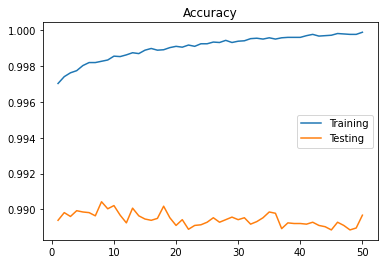

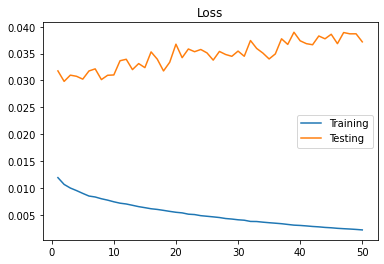

In [ ]:
plot_loss_curves(history)